# week 10

## goals:
- 

## todo
- 


## notes:

looked at:
- Pacific Islands (PIPA)
- Palau National Marine Sanctuary
- Natural Park of the Coral Seas


- Ross Sea
- PIPA
- PMNM
- south/central pacific ocean
- pick out the 5 from Tim White's paper:
    - PIPA - 2010, expanded 2014 <-- some actual results here
    - Pacific Remote Islands - 2009, expanded 2014 (not enough effort)
    - PMNM - yes but low fishing effort (3258 hours, 2016)
    - Pitcairn Islands - yes but low (101 hours, 2016)
    - Nazca-Desventuradas - yes but low (68 hours, 2016)
    
Actual good ones:
- Natural Park of the Coral Seas, 2014 555577562, further off the east coast of Australia
- Marae Moana/Cook Islands, 2017 555624907 - maybe the best one - middle of the Pacific
- French Austral Lands and Seas, 2019 555697868 - south-east of Africa
- Arquipélago Submarino Do Meteor, 2016 555514087 - Atlantic ocean Y shaped area
- Coral Sea, 2018 555556875 just off the east coast of Australia
- Pacífico Mexicano Profundo, 2018 555624307 southwest Mexican coast
- Palau National Marine Sanctuary, 2015, 555622118 oceania (near indonesia, phillippines) 


A bunch of these at the top are coastal around Spain/France:
- Espacio marino del Delta de l'Ebre-Illes Columbretes 2014
- Espacio marino de la Costa da Morte 2014
- Pertuis charentais - Rochebonne 2019




In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
cd /Users/brendan/Masters/gfw_research

/Users/brendan/Masters/gfw_research


In [54]:
import numpy as np
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pywdpa
import geopandas
import contextily as ctx
from shapely import geometry
from shapely import ops
import pretty_html_table

import util

pandas.set_option('display.max_columns', None)
# pandas.set_option('display.max_rows', None)

In [5]:
def load_year(year):
    year = str(year)
    print(f'\r reading year {year}', end='')
    return pandas.read_parquet("data/" + year + ".parquet")

In [29]:
points_by_year = {
    year : load_year(year)
    for year in range(2012, 2021)
}


 reading year 2020

In [33]:
points_by_year = {year: points_by_year_full[year].sample(frac=1/10) for year in [2012, 2013, 2014]}

In [7]:
#mpas = util.load_mpas()
mpas = geopandas.read_parquet("data/mpas.parquet")

In [34]:
# sample the points here before converting to geo
# use the sampled points to find the mmsi that are interesting
# only then should we get all of the points of relevent mmsi

SAMPLE_RATIO = 100
points_sampled = []
for year, points in points_by_year.items():
    print(f'\rsampling {str(year)}... ', end='')
    points_sampled.append(points.sample(frac=1/SAMPLE_RATIO))
print('done.')
points_sampled = pandas.concat(points_sampled)
print("converting to geo...  ", end='')
geopoints_sampled = util.convert_to_geo(points_sampled, box=True)
print("done.")


sampling 2014... done.
converting to geo...  done.


In [ ]:
"""Actual good ones:
- Natural Park of the Coral Seas, 2014 555577562, further off the east coast of Australia
- Marae Moana/Cook Islands, 2017 555624907 - maybe the best one - middle of the Pacific
- French Austral Lands and Seas, 2019 555697868 - south-east of Africa
- Arquipélago Submarino Do Meteor, 2016 555514087 - Atlantic ocean Y shaped area
- Coral Sea, 2018 555556875 just off the east coast of Australia
- Pacífico Mexicano Profundo, 2018 555624307 southwest Mexican coast
- Palau National Marine Sanctuary, 2015, 555622118 oceania (near indonesia, phillippines)
"""

# TODO - enter the dates, figure out how to consolidate the multiple-entry ones
mpas_of_interest = [
    ("Marae Moana", 555624907.0, "2017-07-13"),
    ("French Austral Lands and Seas", 555697868, "2019-01-01"), # date is kind of a guess
    ("Arquipélago Submarino Do Meteor", 555697868, "2016-01-01"), # date is rough
    ("Coral Sea", 555556875, "2018-07-01"), # wikipedia
    ("Pacífico Mexicano Profundo", 555624307, "2016-07-12"), 
    ("PIPA", 555512002, "2015-01-01"),
]
for mpa_ in mpas_of_interest:
    print(mpa_[0])
    mpa = mpas[mpas['WDPAID'] == mpa_[1]]
    print(mpa.shape)
    print(mpa)

running sjoin... 
found 113 sampled points in the mpa from 74 ships
found 66670 points of mpa ships
running sjoin on geopoints of mpa ships
joined (66670,)
            date  cell_ll_lat  cell_ll_lon       mmsi   hours  fishing_hours  \
6687  2012-12-30        -14.2       -135.2  440931000  2.6888         2.6888   
2818  2012-01-17         -4.8       -150.8  440931000  0.7783         0.7783   
12487 2012-04-19         10.9        175.7  440931000  1.2422         1.2422   
558   2012-01-28         11.0       -176.7  440549000  1.8030         1.8030   
11932 2012-04-10          3.1       -155.6  441644000  1.4102         1.4102   
...          ...          ...          ...        ...     ...            ...   
17970 2014-07-02         29.7        130.9  440820000  0.4705         0.0000   
314   2014-01-03         -6.0       -173.2  441837000  0.5163         0.0000   
32042 2014-02-04         -4.4       -170.5  440954000  0.7802         0.7802   
33352 2014-08-24         -4.1       -173.2  

/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


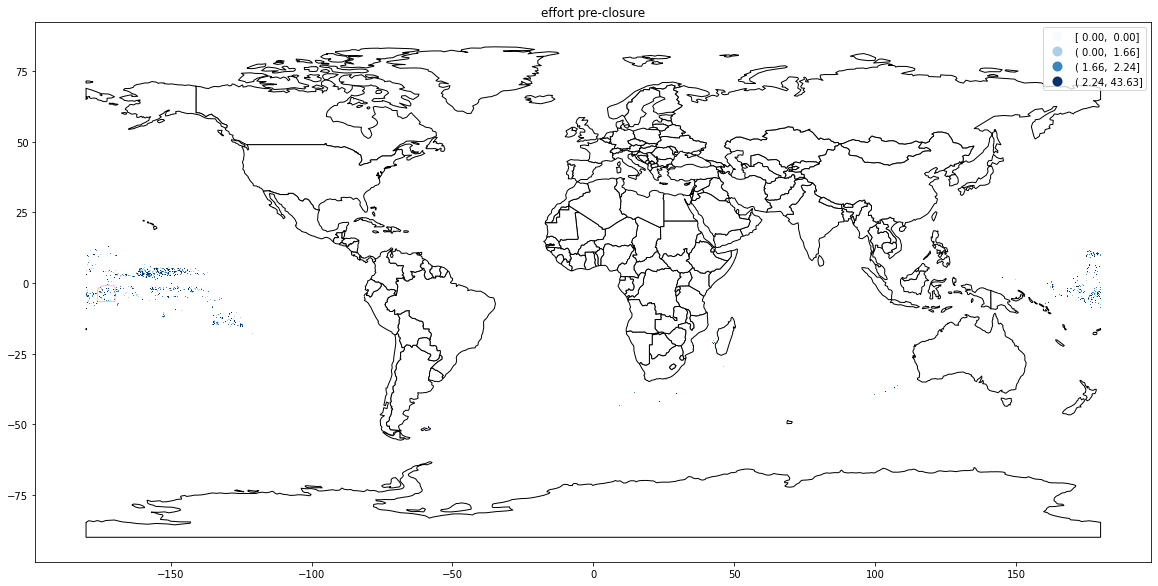

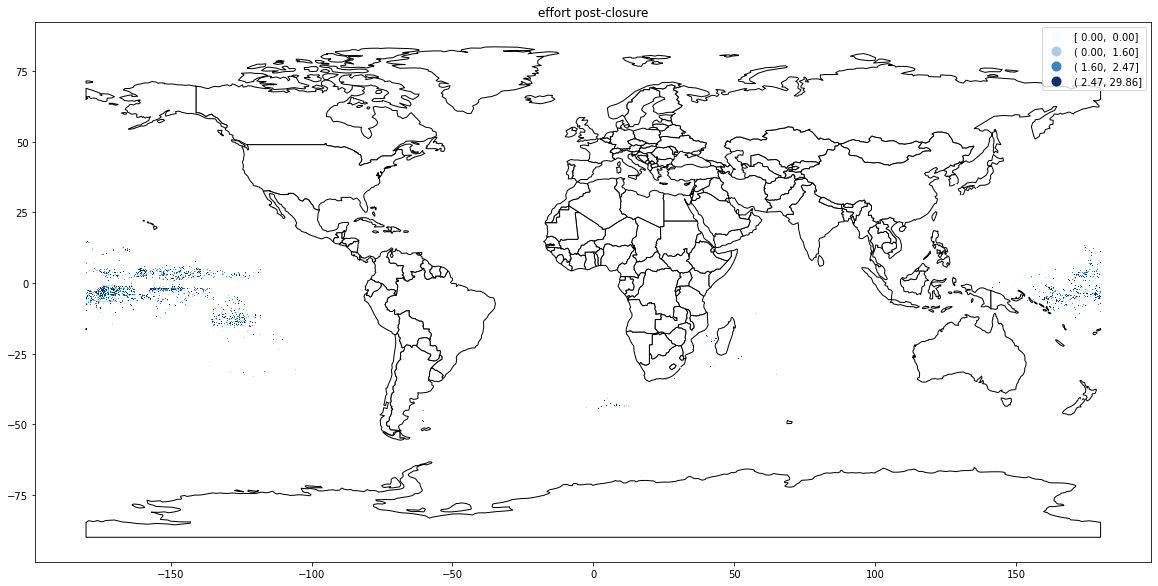

In [62]:
import util
pipa = mpas[mpas['WDPAID'] == 555512002.0]
pipa_res = util.analyze_mpa(geopoints_sampled, points_by_year, pipa, '2013-01-01')

running sjoin... 
found 20 sampled points in the mpa from 9 ships
found 3684 points of mpa ships
running sjoin on geopoints of mpa ships


/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/usr/local/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


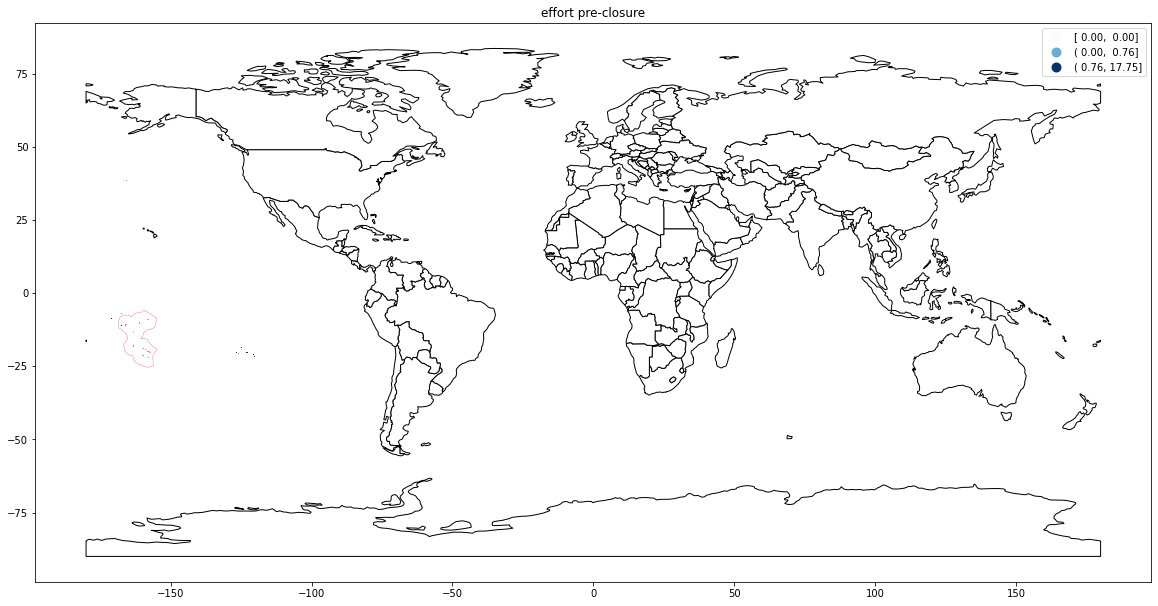

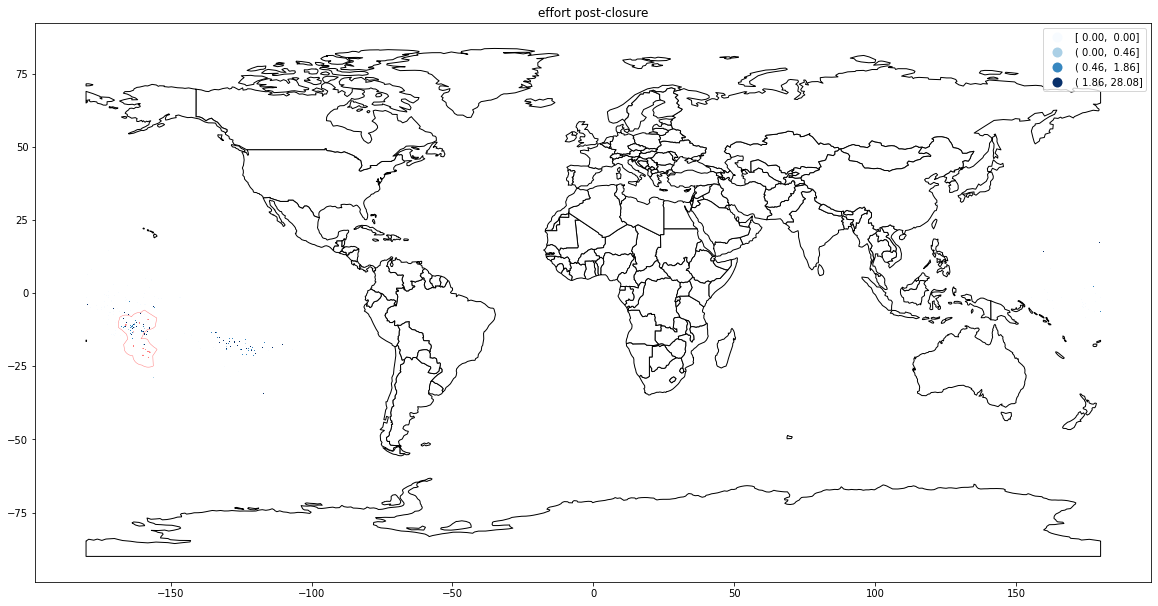

In [63]:
import util
marae_moana = mpas[mpas['WDPAID'] == 555624907.0]
marae_moana_results = util.analyze_mpa(geopoints_sampled, points_by_year, marae_moana, '2013-01-01')